In [1]:
%autosave 10

Autosaving every 10 seconds


In [3]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [5]:
df = pd.read_csv('cleaned_data.csv')
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,test_size=0.2, random_state=24)

In [7]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [9]:
y_pred_proba = example_lr.predict_proba(X_test_2)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [12]:
from sklearn import metrics
metrics.roc_auc_score(y_test_2, y_pred_proba[:,1])

0.6201990844642832

In [13]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_pred_proba[:,1])

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

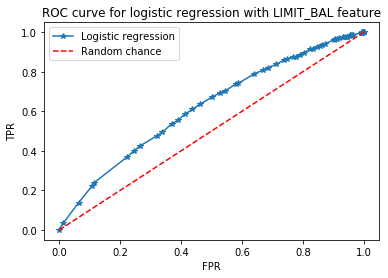

In [14]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [16]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_pred_proba[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0, 1)

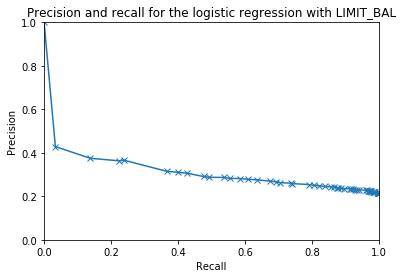

In [17]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [18]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [19]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [20]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
